Empty DataFrame
Columns: [source, target]
Index: []
Empty DataFrame
Columns: [source, target]
Index: []


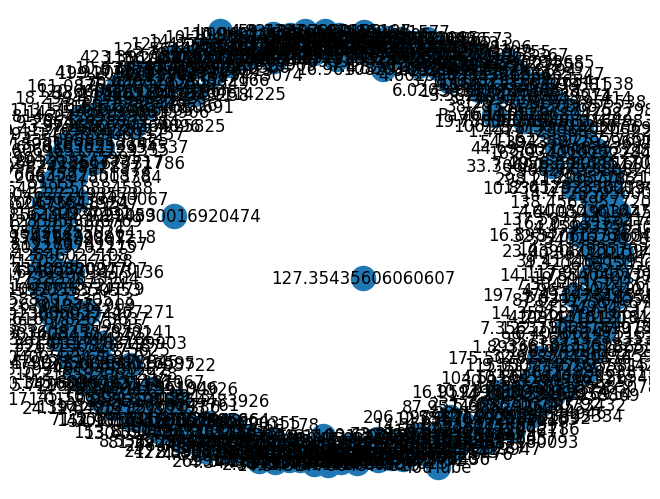

In [9]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Read the CSV file
df = pd.read_csv("D:\IIT BHU Intership\CSV Files\csv16.csv")


# Step 2: Create a graph
G = nx.Graph()

# Step 3: Add nodes and edges to the graph
for index, row in df.iterrows():
    app_name = row['App Name']
    payload_ratio = row['Payload Ratio']
    G.add_node(app_name, payload_ratio=payload_ratio)

# Step 4: Visualize the graph
pos = nx.spring_layout(G)  # Define the layout for node placement
nx.draw(G, pos, with_labels=True)
node_labels = nx.get_node_attributes(G, 'Payload_Ratio')
nx.draw_networkx_labels(G, pos, labels=node_labels)

# Step 5: Convert the graph to a graph dataset
graph_dataset = nx.to_pandas_edgelist(G)
print(graph_dataset)

# Step 6: Save the graph dataset as a new CSV file
graph_dataset.to_csv('graph_dataset.csv', index=False)

# Step 2: Create a graph
G = nx.Graph()

# Step 3: Add nodes and edges to the graph
for index, row in df.iterrows():
    app_name = row['App Name']
    payload_ratio = row['Payload Ratio']
    G.add_node(payload_ratio,app_name=app_name)

# Step 4: Visualize the graph
pos = nx.spring_layout(G)  # Define the layout for node placement
nx.draw(G, pos, with_labels=True)
node_labels = nx.get_node_attributes(G, 'Payload_Ratio')
nx.draw_networkx_labels(G, pos, labels=node_labels)

# Step 5: Convert the graph to a graph dataset
graph_dataset = nx.to_pandas_edgelist(G)
print(graph_dataset)

# Step 6: Save the graph dataset as a new CSV file
graph_dataset.to_csv('graph_dataset.csv', index=False)


In [2]:
import pandas as pd
import networkx as nx

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("D:\IIT BHU Intership\CSV Files\csv16.csv")

# Create an empty graph
graph = nx.Graph()

# Iterate over the DataFrame rows
for _, row in df.iterrows():
    app_name = row['App Name']
    payload_ratio = row['Payload Ratio']
    socket = row['Socket']
    
    # Add the node to the graph with the payload ratio as an attribute
    graph.add_node(socket, payload_ratio=payload_ratio)
    
    # Add an edge between the app name and the socket
    graph.add_edge(app_name, socket)

# Print the graph information
print("Graph Nodes:", graph.nodes())
print("Graph Edges:", graph.edges())
print("Node Attributes:")
for node, attrs in graph.nodes(data=True):
    print(node, attrs)


Graph Nodes: ['10.215.173.2:853', 'YouTube', '142.250.192.10:443', '142.250.183.54:443', '142.250.199.129:443', '142.250.192.110:443', '142.250.192.67:443', '142.250.192.14:443', '142.251.42.78:443', '180.149.59.14:443', '180.149.59.13:443', '180.149.59.41:443', '180.149.59.40:443', '142.251.42.68:443', '74.125.24.102:443', '142.250.66.3:443', '142.251.42.38:443', '180.149.59.12:443', '172.217.174.65:443', '142.250.183.33:443', '172.217.174.66:443', '142.250.183.173:443', '142.250.192.106:443', '142.250.183.131:443', '142.250.192.46:443', '142.250.192.78:443', '142.250.66.14:443', '172.217.166.68:443', '142.250.183.111:443', '142.250.193.202:443', '142.250.183.46:443', '142.250.199.174:443', '142.251.12.138:443', '142.250.183.65:443', '142.251.42.77:443', '142.250.183.170:443', '142.250.77.33:443', '142.250.67.162:443', '142.250.67.138:443', '142.250.66.1:443', '172.217.166.46:443', '142.250.77.86:443', '142.250.199.170:443', '142.250.67.174:443', '142.250.192.35:443', '172.217.166.161

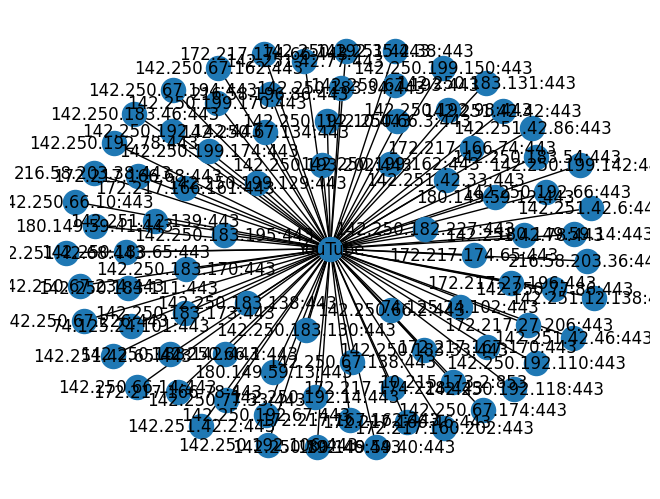

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Read the CSV file
df = pd.read_csv("D:\IIT BHU Intership\CSV Files\csv16.csv")

# Step 2: Create a graph
G = nx.Graph()

# Step 3: Add nodes and edges to the graph
for index, row in df.iterrows():
    app_name = row['App Name']
    payload_ratio = row['Payload Ratio']
    socket = row['Socket']
    G.add_node(socket, payload_ratio=payload_ratio)
    G.add_edge(app_name, socket)

# Step 4: Visualize the graph
pos = nx.spring_layout(G)  # Define the layout for node placement
nx.draw(G, pos, with_labels=True)
node_labels = nx.get_node_attributes(G, 'Payload_Ratio')
nx.draw_networkx_labels(G, pos, labels=node_labels)

# Step 5: Convert the graph to a graph dataset
graph_dataset = nx.to_pandas_edgelist(G)

# Step 6: Save the graph dataset as a new CSV file
graph_dataset.to_csv('graph_dataset.csv', index=False)

# Show the graph visualization
plt.show()
